In [19]:
# importation des biblioteques 
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from datetime import datetime

In [20]:
df = pd.read_excel("C:\\Users\\Koffi Bekanti Grace\\OneDrive - Metrics & Decisions\\Fichiers de Ismael Traoré - Work by Bekanti\\Bekanti\\Data\\BD_TEST.xlsx",sheet_name='DATA')

In [21]:
df

,PAYS,ANNEE,P1_NFB,P1_NSB,P1_NEF,P1_NSEF,P1_NB,P1_NEF1,P1_NTB-EF,P1_NDG,...,P1_NCI,P2_NTT,P2_VMJ,P2_VTT,P2_VMT,P2_VMJM,P2_NTPP,P2_VTPP,P2_VDP,P2_VP
0,Bénin,2010,13,0,0,0,13,0,13,54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Burkina Faso,2010,11,1,4,1,12,5,17,113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Côte d'ivoire,2010,20,1,1,0,21,1,22,356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Guinée - bissau,2010,4,0,0,0,4,0,4,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mali,2010,13,0,2,1,13,3,16,205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Guinée - bissau,2024,6,3,0,0,9,0,9,97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,Mali,2024,14,1,3,1,15,4,19,485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,Niger,2024,14,4,6,0,18,6,24,219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,Sénégal,2024,29,6,4,1,35,5,40,760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df['PAYS'].unique()

array(['Bénin ', 'Burkina Faso', "Côte d'ivoire", 'Guinée - bissau',
       'Mali', 'Niger', 'Sénégal', 'Togo', 'Bénin'], dtype=object)

In [23]:
df = df.copy()  # pour être sûr

df["PAYS"] = (
    df["PAYS"]
    .str.strip()
    .str.title()
    .replace({
        "Benin": "Bénin",
        "benin": "Bénin",
        "Côte D'Ivoire": "Côte d'Ivoire",
        "Guinée - Bissau": "Guinée-Bissau"
    })
)

In [24]:
df['PAYS'].unique()

array(['Bénin', 'Burkina Faso', "Côte d'Ivoire", 'Guinée-Bissau', 'Mali',
       'Niger', 'Sénégal', 'Togo'], dtype=object)

In [25]:
# Identifier les colonnes numériques (toutes sauf PAYS et ANNEE)
num_cols = [col for col in df.columns if col not in ["PAYS", "ANNEE"]]
num_cols

['P1_NFB',
 'P1_NSB',
 'P1_NEF',
 'P1_NSEF',
 'P1_NB',
 'P1_NEF1',
 'P1_NTB-EF',
 'P1_NDG',
 'P1_NG',
 'P1_EB',
 'P1_EEF',
 'P1_EB-EF',
 'P1_ECEF',
 'P1_ECB',
 'P1_ETC',
 'P1_EEEF',
 'P1_EEB',
 'P1_ETE',
 'P1_ETEC',
 'P2_NCEF',
 'P2_NCB',
 'P2_TNC',
 'P2_NCPP',
 'P2_NCPM',
 'P2_NCP+M',
 'P3_TBD',
 'P3_TND',
 'P4_PNB',
 'P4_RMF',
 'P4_TBF',
 'P4_RSM',
 'P4_DE',
 'P4_FPN',
 'P4_ARM',
 'P4_EM',
 'P3_CM',
 'P4_AEM',
 'P3_CFSP',
 'P2_TB',
 'P3_CIFS',
 'P4_SUP',
 'P4_POPU',
 'P4_PIBH',
 'P4_PIB',
 'P4_TIMA',
 'P4_RFP',
 'P4_TCPIB',
 'P3_CAD',
 'P3_CAF',
 'P3_CANF',
 'P3_CIM',
 'P3_CISBLM',
 'P3_CAP',
 'P3_CEOA',
 'P3_CCP',
 'P3_CCCF',
 'P3_CSE',
 'P3_CAC',
 'P3_CEP',
 'P3_CCEI',
 'P3_CCCG',
 'P3_CONG',
 'P3_CPB',
 'P3_CECC',
 'P3_CCEI2',
 'P3_CCT',
 'P3_CCCE',
 'P3_CCI',
 'P3_CEA',
 'P3_CDC 1',
 'P3_CDC 2',
 'P3_CDC 3',
 'P3_CDC 4',
 'P3_CDC 5',
 'P3_CDC 6',
 'P3_CDC 7',
 'P3_CDC 8',
 'P3_CPP',
 'P3_CPM',
 'P2_DSIAI',
 'P2_DSISF',
 'P2_DSISN',
 'P2_DSIM',
 'P2_DSII',
 'P2_DSIAP',
 'P2_DCCE',

In [26]:
# S'assurer que les colonnes sont bien numériques
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")
# Remplacer les NaN par la moyenne du pays + corriger le FutureWarning avec copy=False
df[num_cols] = df.groupby("PAYS")[num_cols].transform(
    lambda col: col.fillna(col.mean()).infer_objects(copy=False))

In [40]:
# Demander à l'utilisateur s'il veut filtrer par année
choix = input("Voulez-vous faire la notation par année ? (oui/non) : ").strip().lower()
if choix == "oui":
    # Demande une seule fois l'année
    annee = input("Veuillez entrer l'année pour le scoring (entre 2010 et 2024) : ").strip()
    # Vérification : entier valide et dans l'intervalle
    if annee.isdigit() and 2010 <= int(annee) <= 2024:
        annee = int(annee)  # conversion en entier
        df_annee = df[df["ANNEE"] == annee]
        print(f"La notation sera effectuée uniquement sur l'année {annee}.")
        print("Utilisez la base de données : df_annee")
    else:
        print(" Erreur : veuillez entrer une année valide entre 2010 et 2024.")

elif choix == "non":
    # Notation sur toute la période
    df_annee = df[(df["ANNEE"] >= 2010) & (df["ANNEE"] <= 2024)]
    print("La notation sera effectuée sur toute la période 2010 à 2024.")
    print("Utilisez la base de données : df_annee")

else:
    print("Réponse invalide. Veuillez répondre par 'oui' ou 'non'.")


Voulez-vous faire la notation par année ? (oui/non) :  OUI
Veuillez entrer l'année pour le scoring (entre 2010 et 2024) :  2015


La notation sera effectuée uniquement sur l'année 2015.
Utilisez la base de données : df_annee


In [41]:
df_annee

,PAYS,ANNEE,P1_NFB,P1_NSB,P1_NEF,P1_NSEF,P1_NB,P1_NEF1,P1_NTB-EF,P1_NDG,...,P1_NCI,P2_NTT,P2_VMJ,P2_VTT,P2_VMT,P2_VMJM,P2_NTPP,P2_VTPP,P2_VDP,P2_VP
40,Bénin,2015,13,2,0,0,15,0,15,277.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,Burkina Faso,2015,11,2,3,1,13,4,17,341.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,Côte d'Ivoire,2015,23,3,1,1,26,2,28,896.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,Guinée-Bissau,2015,3,2,0,0,5,0,5,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,Mali,2015,13,1,2,1,14,3,17,405.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,Niger,2015,9,3,1,0,12,1,13,145.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,Sénégal,2015,20,4,2,1,24,3,27,454.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,Togo,2015,11,2,2,0,13,2,15,239.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Nettoyage des données
df_annee_numeric = df_annee.select_dtypes(include=[np.number])  # Garder uniquement les colonnes numériques
df_annee_numeric = df_annee_numeric.loc[:, df_annee_numeric.var() != 0]  # Supprimer les colonnes à variance nulle

In [39]:
#uniquement pour la periode 2010-2024
df_annee_numeric = df_annee_numeric.drop(columns=["ANNEE"])
#uniquement pour la periode 2010-2024
for annee, df_annee in df.groupby('ANNEE'):
    # Sélection des colonnes numériques
    df_annee_numeric = df_annee.select_dtypes(include='number')
    # Standardisation des données
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_annee_numeric)
    x_scaled_df = pd.DataFrame(X_scaled, columns=df_annee_numeric.columns, index=df_annee.index)
    x_scaled_df

In [43]:
# Standardisation  des données entre 0 et 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_annee_numeric)
x_scaled_df = pd.DataFrame(X_scaled, columns=df_annee_numeric.columns)
x_scaled_df

,P1_NFB,P1_NSB,P1_NEF,P1_NSEF,P1_NB,P1_NEF1,P1_NTB-EF,P1_NDG,P1_NG,P1_EB,...,P2_DRSC,P2_DRSA,P2_DON1,P2_DON2,P2_DON3,P2_DON4,P2_DON5,P2_DON6,P2_DON7,P2_DON8
0,0.021403,-0.437595,-1.385870,-1.0,-0.039559,-1.375048,-0.304789,-0.301760,-0.518639,-0.253873,...,2.632514,-0.379130,-0.840634,-1.064010,-0.922335,-0.755161,0.030342,0.542940,0.257556,-0.449889
1,-0.321044,-0.437595,1.637846,1.0,-0.356034,1.558387,-0.017929,-0.036750,-0.124736,-0.118995,...,-0.419676,-0.379130,1.894736,0.522297,1.241338,0.785381,1.379669,0.476284,-0.483952,0.090384
2,1.733637,0.729325,-0.377964,1.0,1.701054,0.091670,1.559801,2.261390,1.739740,2.167080,...,-0.419676,2.645742,0.717288,1.587800,0.653871,1.820915,1.313036,1.127347,-0.682366,2.263665
3,-1.690831,-0.437595,-1.385870,-1.0,-1.621935,-1.375048,-1.739089,-1.274846,-1.453503,-1.339245,...,-0.419676,-0.379130,-0.773854,-1.132888,-1.210369,-1.616091,-1.364201,-1.698577,-0.682366,-0.803302
4,0.021403,-1.604515,0.629941,1.0,-0.197797,0.825029,-0.017929,0.228261,1.204031,-0.027611,...,-0.419676,-0.379130,-0.863480,-0.438483,-0.718659,-0.336112,-0.514624,-0.763837,-0.497943,-0.803302
5,-0.663491,0.729325,-0.377964,-1.0,-0.514272,-0.641689,-0.591649,-0.848345,-0.818006,-0.747446,...,-0.419676,-0.379130,-0.854694,-1.081581,-1.067492,-0.665173,-1.311846,-0.622773,-0.646753,-0.295526
6,1.219967,1.896245,0.629941,1.0,1.384579,0.825029,1.416371,0.431160,0.463493,0.800713,...,-0.114457,-0.370962,-0.293209,0.541274,0.933545,0.248139,0.689537,1.446678,2.454100,0.801270
7,-0.321044,-0.437595,0.629941,-1.0,-0.356034,0.091670,-0.304789,-0.459110,-0.492379,-0.480623,...,-0.419676,-0.379130,1.013847,1.065591,1.090101,0.518103,-0.221913,-0.508062,0.281722,-0.803302


In [44]:
# Application de l'ACP pour réduction de dimension
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
X_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-3.202729,-2.640329,3.685148,1.070219,-4.271266,-1.705743,0.103275,5.561652e-16
1,2.546549,5.923321,-1.687503,-2.721208,-0.645547,-2.765590,0.002452,5.561652e-16
2,15.049972,-3.199517,-3.812474,1.566039,-0.345294,-0.074309,-0.113060,5.561652e-16
3,-10.608996,-2.027321,-2.374059,0.689798,1.800567,-1.003688,-2.340210,5.561652e-16
4,-0.628226,-1.045394,0.098294,-4.448967,-1.182892,3.543418,-0.440451,5.561652e-16
5,-6.625550,-2.187707,-1.265020,-0.449511,1.944669,-0.465339,2.938189,5.561652e-16
6,6.566915,0.412924,5.852416,0.169138,3.390446,-0.119130,-0.421743,5.561652e-16
7,-3.097934,4.764022,-0.496801,4.124491,-0.690683,2.590383,0.271549,5.561652e-16


In [45]:
# Détermination du nombre de composantes pour atteindre 80% de variance expliquée
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.80) + 1
print(f"Nombre de composantes à retenir : {n_components}")

Nombre de composantes à retenir : 3


In [46]:
# ACP FINALE
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)
X_pca_final_df = pd.DataFrame(X_pca_final, columns=[f"PC{i+1}" for i in range(n_components)])
X_pca_final_df

,PC1,PC2,PC3
0,-3.202729,-2.640329,3.685148
1,2.546549,5.923321,-1.687503
2,15.049972,-3.199517,-3.812474
3,-10.608996,-2.027321,-2.374059
4,-0.628226,-1.045394,0.098294
5,-6.625550,-2.187707,-1.265020
6,6.566915,0.412924,5.852416
7,-3.097934,4.764022,-0.496801


In [47]:
# EXTRACTION DES COEFFICIENTS DOMINANTS
coefficients_chargement= pca_final.components_.T
dominant_coeffs = np.max(np.abs(coefficients_chargement), axis=1)
signs = np.sign(coefficients_chargement[np.arange(len(coefficients_chargement)), np.argmax(np.abs(coefficients_chargement), axis=1)])
final_coeffs = dominant_coeffs * signs
#On transpose la matrice des composantes principales (pca_final.components_.T) pour obtenir les coefficients de chaque variable sur chaque axe principal.
#On extrait le coefficient dominant pour chaque variable, c’est-à-dire la valeur absolue la plus élevée parmi ses contributions aux axes, et on récupère
#son signe (positif ou négatif).
#On recompose le coefficient dominant signé (final_coeffs) en multipliant la valeur absolue par son signe, ce qui permet d’identifier 
#à la fois l’importance et la direction de l’influence de chaque variable dans l’analyse.

In [48]:
final_coeffs

array([ 0.12484655,  0.10478924,  0.24438308,  0.10395204,  0.12313123,
        0.19582668,  0.12595182,  0.12844842,  0.11523418,  0.13040671,
        0.13531765,  0.13067023, -0.12837849,  0.12451965,  0.12460424,
        0.17727625,  0.12662039,  0.1269986 ,  0.13067023,  0.12925388,
        0.12925388,  0.12859763,  0.11157192,  0.12925388,  0.22802085,
        0.31023085,  0.13053784, -0.12087951,  0.1306805 ,  0.13100281,
        0.13083155,  0.11620135,  0.12930167,  0.13150161,  0.1317594 ,
        0.12202303,  0.21316324,  0.08293932,  0.21395363, -0.08553567,
        0.09026393,  0.11358028,  0.12139553, -0.24550751, -0.1688971 ,
       -0.10523099,  0.21696163,  0.13098541, -0.13049414,  0.10460397,
        0.22524919,  0.12982369, -0.18039478,  0.19281385,  0.09227584,
        0.12063899, -0.1201808 , -0.14113363,  0.12956343,  0.12249759,
        0.10896479,  0.12944253,  0.12071346,  0.12034647,  0.08280175,
        0.11040918,  0.11814306,  0.13081302,  0.11977161, -0.14

In [49]:
# CRÉATION DU DATAFRAME DES COEFFICIENTS
data = pd.DataFrame({
    'Nom_Variable': df_annee_numeric.columns,
    'Coefficient_ACP': np.round(final_coeffs, 4)
})
data ['Abs'] = data ['Coefficient_ACP'].abs()
data = data.sort_values(by='Abs', ascending=False).drop(columns='Abs').reset_index(drop=True)
data 

,Nom_Variable,Coefficient_ACP
0,P3_TND,0.3102
1,P2_DON7,0.2885
2,P2_DCCC,0.2458
3,P4_TIMA,-0.2455
4,P1_NEF,0.2444
...,...,...
88,P3_CONG,0.0923
89,P4_POPU,0.0903
90,P4_SUP,-0.0855
91,P2_TB,0.0829


In [50]:
# FILTRAGE DES VARIABLES IMPORTANTES
data_import = data['Coefficient_ACP'].abs().quantile(0.75)
data_filtre = data[data['Coefficient_ACP'].abs() >= data_import]
data_filtre
#On calcule le 3e quartile (quantile 0.75) des valeurs absolues de la colonne Coefficient_Dominant, ce qui permet d’identifier les 25 % de variables les plus influentes.
#Le seuil obtenu est utilisé pour filtrer les lignes du tableau : seules celles dont le coefficient (en valeur absolue) est supérieur ou égal à ce seuil sont conservées.
#Ce filtrage permet de sélectionner les variables les plus importantes, en éliminant celles qui ont un impact faible dans l’analyse ou le modèle.

,Nom_Variable,Coefficient_ACP
0,P3_TND,0.3102
1,P2_DON7,0.2885
2,P2_DCCC,0.2458
3,P4_TIMA,-0.2455
4,P1_NEF,0.2444
5,P2_DON1,0.2372
6,P2_DCCG,0.2306
7,P2_DCCA,0.2281
8,P3_TBD,0.2280
9,P3_CAC,0.2252


In [51]:
# Définition dynamique des piliers selon les préfixes P1 à P4
piliers_automatiques = {
    'Structure du Système Bancaire': [col for col in data_filtre['Nom_Variable'] if 'P1' in col],
    'Mobilisation de l’Épargne (Dépôts)': [col for col in data_filtre['Nom_Variable'] if 'P2' in col],
    'Distribution du Crédit': [col for col in data_filtre['Nom_Variable'] if 'P3' in col],
    'Macroéconomique': [col for col in data_filtre['Nom_Variable'] if 'P4' in col]}
# Transformation du dictionnaire en liste de tuples
tableau_piliers = [(pilier, variable) for pilier, variables in piliers_automatiques.items() for variable in variables]
# Création du DataFrame des piliers
df_piliers = pd.DataFrame(tableau_piliers, columns=['Pilier', 'Nom_Variable'])
# Affichage du DataFrame final
df_piliers

,Pilier,Nom_Variable
0,Structure du Système Bancaire,P1_NEF
1,Structure du Système Bancaire,P1_NEF1
2,Structure du Système Bancaire,P1_EEEF
3,Mobilisation de l’Épargne (Dépôts),P2_DON7
4,Mobilisation de l’Épargne (Dépôts),P2_DCCC
5,Mobilisation de l’Épargne (Dépôts),P2_DON1
6,Mobilisation de l’Épargne (Dépôts),P2_DCCG
7,Mobilisation de l’Épargne (Dépôts),P2_DCCA
8,Mobilisation de l’Épargne (Dépôts),P2_DON3
9,Mobilisation de l’Épargne (Dépôts),P2_DRSD


In [52]:
df_nb_pilier = pd.DataFrame(df_piliers.Pilier.value_counts()).reset_index()
df_nb_pilier

,Pilier,count
0,Mobilisation de l’Épargne (Dépôts),11
1,Distribution du Crédit,8
2,Structure du Système Bancaire,3
3,Macroéconomique,2


In [53]:
df_piliers_coeff = df_piliers.merge(data_filtre, how='left', on='Nom_Variable')
df_piliers_coeff

,Pilier,Nom_Variable,Coefficient_ACP
0,Structure du Système Bancaire,P1_NEF,0.2444
1,Structure du Système Bancaire,P1_NEF1,0.1958
2,Structure du Système Bancaire,P1_EEEF,0.1773
3,Mobilisation de l’Épargne (Dépôts),P2_DON7,0.2885
4,Mobilisation de l’Épargne (Dépôts),P2_DCCC,0.2458
5,Mobilisation de l’Épargne (Dépôts),P2_DON1,0.2372
6,Mobilisation de l’Épargne (Dépôts),P2_DCCG,0.2306
7,Mobilisation de l’Épargne (Dépôts),P2_DCCA,0.2281
8,Mobilisation de l’Épargne (Dépôts),P2_DON3,0.2210
9,Mobilisation de l’Épargne (Dépôts),P2_DRSD,0.2096


In [54]:
list_var = df_piliers_coeff.Nom_Variable.unique().tolist()
list_var

['P1_NEF',
 'P1_NEF1',
 'P1_EEEF',
 'P2_DON7',
 'P2_DCCC',
 'P2_DON1',
 'P2_DCCG',
 'P2_DCCA',
 'P2_DON3',
 'P2_DRSD',
 'P2_DCCD',
 'P2_DCCE',
 'P2_DRSC',
 'P2_DRSE',
 'P3_TND',
 'P3_TBD',
 'P3_CAC',
 'P3_CEOA',
 'P3_CIFS',
 'P3_CFSP',
 'P3_CCCG',
 'P3_CCEI',
 'P4_TIMA',
 'P4_RFP']

In [55]:
# Concaténer les features normalisés avec la colonne "PAYS"
df_annee1 = pd.concat([df_annee[["PAYS", "ANNEE"]].reset_index(drop=True), 
                       pd.DataFrame(x_scaled_df, columns=num_cols)], axis=1)

In [56]:
df_annee1

,PAYS,ANNEE,P1_NFB,P1_NSB,P1_NEF,P1_NSEF,P1_NB,P1_NEF1,P1_NTB-EF,P1_NDG,...,P1_NCI,P2_NTT,P2_VMJ,P2_VTT,P2_VMT,P2_VMJM,P2_NTPP,P2_VTPP,P2_VDP,P2_VP
0,Bénin,2015,0.021403,-0.437595,-1.385870,-1.0,-0.039559,-1.375048,-0.304789,-0.301760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Burkina Faso,2015,-0.321044,-0.437595,1.637846,1.0,-0.356034,1.558387,-0.017929,-0.036750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Côte d'Ivoire,2015,1.733637,0.729325,-0.377964,1.0,1.701054,0.091670,1.559801,2.261390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Guinée-Bissau,2015,-1.690831,-0.437595,-1.385870,-1.0,-1.621935,-1.375048,-1.739089,-1.274846,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mali,2015,0.021403,-1.604515,0.629941,1.0,-0.197797,0.825029,-0.017929,0.228261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Niger,2015,-0.663491,0.729325,-0.377964,-1.0,-0.514272,-0.641689,-0.591649,-0.848345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Sénégal,2015,1.219967,1.896245,0.629941,1.0,1.384579,0.825029,1.416371,0.431160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Togo,2015,-0.321044,-0.437595,0.629941,-1.0,-0.356034,0.091670,-0.304789,-0.459110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df_annee_good=df_annee1.reset_index(drop=True)
colonnes = ["PAYS", "ANNEE"] + list_var
df_annee_good = df_annee_good[colonnes]
df_annee_good.head(50)

,PAYS,ANNEE,P1_NEF,P1_NEF1,P1_EEEF,P2_DON7,P2_DCCC,P2_DON1,P2_DCCG,P2_DCCA,...,P3_TND,P3_TBD,P3_CAC,P3_CEOA,P3_CIFS,P3_CFSP,P3_CCCG,P3_CCEI,P4_TIMA,P4_RFP
0,Bénin,2015,-1.385870,-1.375048,-1.033275,0.257556,-0.544878,-0.840634,-0.359593,-0.931103,...,1.673536,1.587426,-0.394614,0.906252,-0.426656,-0.419246,-0.589637,-0.585209,-1.400402,-2.197304
1,Burkina Faso,2015,1.637846,1.558387,1.967829,-0.483952,2.572427,1.894736,1.388638,0.922391,...,-1.026943,-1.012453,-0.559273,-0.617919,0.699882,0.701138,-0.392310,-0.116038,-0.261092,0.501917
2,Côte d'Ivoire,2015,-0.377964,0.091670,0.440952,-0.682366,-0.365932,0.717288,0.641119,0.313410,...,-0.760698,-0.932456,-0.042584,0.807494,-0.425841,-0.418306,0.416730,2.564432,0.308563,1.208355
3,Guinée-Bissau,2015,-1.385870,-1.375048,-1.033275,-0.682366,-0.552930,-0.773854,-1.045623,-0.856432,...,-0.456419,-1.472431,-0.559273,-0.971310,-1.641895,-1.664587,-0.756379,-0.684953,0.878218,0.682522
4,Mali,2015,0.629941,0.825029,-0.190860,-0.497943,-0.566432,-0.863480,-0.853921,-0.946037,...,0.076070,0.007500,-0.536562,-0.719969,0.693621,0.693496,0.170071,-0.316806,0.688333,-0.329741
5,Niger,2015,-0.377964,-0.641689,-0.717369,-0.646753,-0.569686,-0.854694,-0.890091,-1.082103,...,-0.684628,0.287487,-0.042584,-0.428632,-1.167890,-1.151004,-0.589637,0.120327,-0.071207,0.336636
6,Sénégal,2015,0.629941,0.825029,1.020112,2.454100,0.000905,-0.293209,-0.510303,1.121513,...,1.635501,0.487477,2.591962,1.921818,1.007488,1.005494,2.429464,-0.521134,-1.590287,0.511768
7,Togo,2015,0.629941,0.091670,-0.454114,0.281722,0.026527,1.013847,1.629774,1.458361,...,-0.456419,1.047451,-0.457071,-0.897735,1.261293,1.253015,-0.688301,-0.460619,1.447874,-0.714155


In [58]:
df_annee_good.shape

(8, 26)

In [59]:
# Étape 1 : Extraire la liste des variables nécessaires
liste_variables = list_var
# Étape 2 : S'assurer que ces variables existent bien dans df_annee_good
variables_utiles = [var for var in liste_variables if var in df_annee_good.columns]
# Étape 3 : Filtrer le DataFrame de base avec seulement les colonnes utiles
colonnes_a_garder = ['PAYS', 'ANNEE'] + variables_utiles
df_filtre = df_annee_good[colonnes_a_garder]
# Étape 4 : Transformation en format long (melt)
df_long = df_filtre.melt(id_vars=['PAYS', 'ANNEE'], 
                         var_name='critere', 
                         value_name='Valeur')
# Étape 5 : Jointure avec les informations sur les piliers et coefficients
df_final = df_long.merge(df_piliers_coeff, 
                         left_on='critere', 
                         right_on='Nom_Variable', 
                         how='inner')
# Étape 6 : Réorganiser les colonnes
df_final = df_final[['PAYS', 'ANNEE', 'Pilier', 'Nom_Variable', 'Valeur', 'Coefficient_ACP']]

In [60]:
df_final

,PAYS,ANNEE,Pilier,Nom_Variable,Valeur,Coefficient_ACP
0,Bénin,2015,Structure du Système Bancaire,P1_NEF,-1.385870,0.2444
1,Burkina Faso,2015,Structure du Système Bancaire,P1_NEF,1.637846,0.2444
2,Côte d'Ivoire,2015,Structure du Système Bancaire,P1_NEF,-0.377964,0.2444
3,Guinée-Bissau,2015,Structure du Système Bancaire,P1_NEF,-1.385870,0.2444
4,Mali,2015,Structure du Système Bancaire,P1_NEF,0.629941,0.2444
...,...,...,...,...,...,...
187,Guinée-Bissau,2015,Macroéconomique,P4_RFP,0.682522,-0.1689
188,Mali,2015,Macroéconomique,P4_RFP,-0.329741,-0.1689
189,Niger,2015,Macroéconomique,P4_RFP,0.336636,-0.1689
190,Sénégal,2015,Macroéconomique,P4_RFP,0.511768,-0.1689


In [61]:
df_final['score_critere'] = df_final['Valeur'] * df_final['Coefficient_ACP']
df_final 

,PAYS,ANNEE,Pilier,Nom_Variable,Valeur,Coefficient_ACP,score_critere
0,Bénin,2015,Structure du Système Bancaire,P1_NEF,-1.385870,0.2444,-0.338707
1,Burkina Faso,2015,Structure du Système Bancaire,P1_NEF,1.637846,0.2444,0.400290
2,Côte d'Ivoire,2015,Structure du Système Bancaire,P1_NEF,-0.377964,0.2444,-0.092375
3,Guinée-Bissau,2015,Structure du Système Bancaire,P1_NEF,-1.385870,0.2444,-0.338707
4,Mali,2015,Structure du Système Bancaire,P1_NEF,0.629941,0.2444,0.153958
...,...,...,...,...,...,...,...
187,Guinée-Bissau,2015,Macroéconomique,P4_RFP,0.682522,-0.1689,-0.115278
188,Mali,2015,Macroéconomique,P4_RFP,-0.329741,-0.1689,0.055693
189,Niger,2015,Macroéconomique,P4_RFP,0.336636,-0.1689,-0.056858
190,Sénégal,2015,Macroéconomique,P4_RFP,0.511768,-0.1689,-0.086438


In [62]:
min_score = df_final['score_critere'].min()
max_score = df_final['score_critere'].max()
df_final['score_normalise'] = 0+ ((df_final['score_critere'] - min_score) / (max_score - min_score)) * 100

In [63]:
# Normalisation par année : chaque année est ramenée entre 0 et 100 pour la periode 
df_final['score_normalise']= df_final.groupby('ANNEE')['score_critere'].transform(
    lambda x: 100 * (x - x.min()) / (x.max() - x.min())
)

In [64]:
df_final.head(50)

,PAYS,ANNEE,Pilier,Nom_Variable,Valeur,Coefficient_ACP,score_critere,score_normalise
0,Bénin,2015,Structure du Système Bancaire,P1_NEF,-1.385870,0.2444,-0.338707,10.585478
1,Burkina Faso,2015,Structure du Système Bancaire,P1_NEF,1.637846,0.2444,0.400290,73.713480
2,Côte d'Ivoire,2015,Structure du Système Bancaire,P1_NEF,-0.377964,0.2444,-0.092375,31.628145
3,Guinée-Bissau,2015,Structure du Système Bancaire,P1_NEF,-1.385870,0.2444,-0.338707,10.585478
4,Mali,2015,Structure du Système Bancaire,P1_NEF,0.629941,0.2444,0.153958,52.670812
5,Niger,2015,Structure du Système Bancaire,P1_NEF,-0.377964,0.2444,-0.092375,31.628145
6,Sénégal,2015,Structure du Système Bancaire,P1_NEF,0.629941,0.2444,0.153958,52.670812
7,Togo,2015,Structure du Système Bancaire,P1_NEF,0.629941,0.2444,0.153958,52.670812
8,Bénin,2015,Structure du Système Bancaire,P1_NEF1,-1.375048,0.1958,-0.269234,16.520072
9,Burkina Faso,2015,Structure du Système Bancaire,P1_NEF1,1.558387,0.1958,0.305132,65.584762


In [65]:
# AGRÉGATION PAR PILIER
df_piliers = df_final.groupby(['PAYS', 'ANNEE', 'Pilier']).agg({
    'score_normalise': 'sum',
    'Nom_Variable': lambda x: ' + '.join(x)
}).reset_index()
df_piliers = df_piliers.merge(df_nb_pilier,how='left', on='Pilier')
df_piliers.head()
df_piliers['Score_somme_criteres'] = df_piliers['score_normalise']/df_piliers['count']
df_piliers

,PAYS,ANNEE,Pilier,score_normalise,Nom_Variable,count,Score_somme_criteres
0,Burkina Faso,2015,Distribution du Crédit,267.898816,P3_TND + P3_TBD + P3_CAC + P3_CEOA + P3_CIFS +...,8,33.487352
1,Burkina Faso,2015,Macroéconomique,77.272087,P4_TIMA + P4_RFP,2,38.636044
2,Burkina Faso,2015,Mobilisation de l’Épargne (Dépôts),621.621783,P2_DON7 + P2_DCCC + P2_DON1 + P2_DCCG + P2_DCC...,11,56.511071
3,Burkina Faso,2015,Structure du Système Bancaire,208.621490,P1_NEF + P1_NEF1 + P1_EEEF,3,69.540497
4,Bénin,2015,Distribution du Crédit,384.497100,P3_TND + P3_TBD + P3_CAC + P3_CEOA + P3_CIFS +...,8,48.062137
5,Bénin,2015,Macroéconomique,140.109899,P4_TIMA + P4_RFP,2,70.054949
6,Bénin,2015,Mobilisation de l’Épargne (Dépôts),400.473393,P2_DON7 + P2_DCCC + P2_DON1 + P2_DCCG + P2_DCC...,11,36.406672
7,Bénin,2015,Structure du Système Bancaire,50.975049,P1_NEF + P1_NEF1 + P1_EEEF,3,16.991683
8,Côte d'Ivoire,2015,Distribution du Crédit,243.925185,P3_TND + P3_TBD + P3_CAC + P3_CEOA + P3_CIFS +...,8,30.490648
9,Côte d'Ivoire,2015,Macroéconomique,55.132939,P4_TIMA + P4_RFP,2,27.566470


In [66]:
# PONDÉRATIONS
reponse = input("Voulez-vous entrer vos propres pondérations pour les piliers ? (oui/non) ").strip().lower()
if reponse == "oui":
    poids_structure = float(input("Pondération pour Structure du Système Bancaire = "))
    poids_epargne = float(input("Pondération pour Mobilisation de l'Épargne (Dépôts) = "))
    poids_credit = float(input("Pondération pour Distribution du Crédit = "))
    poids_macro = float(input("Pondération pour Macroéconomique = "))
else:
    #determination automatique 
    poids_structure = poids_epargne = poids_credit = poids_macro = 1*100/len(df_piliers.Pilier.unique())

Voulez-vous entrer vos propres pondérations pour les piliers ? (oui/non)  NON


In [208]:
# CALCUL DU SCORE PONDÉRÉ
df_piliers['Pondération'] = df_piliers['Pilier'].map({
    'Structure du Système Bancaire': poids_structure,
    "Mobilisation de l’Épargne (Dépôts)": poids_epargne,
    'Distribution du Crédit': poids_credit,
    'Macroéconomique': poids_macro
})
df_piliers['Score_Pilier_Pondéré'] = df_piliers['Score_somme_criteres'] * (df_piliers['Pondération']/ 100)

In [209]:
df_piliers.head(20)

,PAYS,ANNEE,Pilier,score_normalise,Nom_Variable,count,Score_somme_criteres,Pondération,Score_Pilier_Pondéré
0,Burkina Faso,2011,Distribution du Crédit,202.496194,P3_CCCG + P3_TBD + P3_CCCF + P3_TND + P3_CAD +...,8,25.312024,25.0,6.328006
1,Burkina Faso,2011,Macroéconomique,146.490355,P4_FPN + P4_TCPIB + P4_TIMA + P4_RFP,4,36.622589,25.0,9.155647
2,Burkina Faso,2011,Mobilisation de l’Épargne (Dépôts),373.923789,P2_VMT + P2_DRSA + P2_DRSE + P2_DCCC + P2_VTPP...,11,33.993072,30.0,10.197922
3,Burkina Faso,2011,Structure du Système Bancaire,528.269328,P1_ETE + P1_EEF + P1_EEEF + P1_ECEF + P1_EB-EF...,8,66.033666,20.0,13.206733
4,Bénin,2011,Distribution du Crédit,256.765165,P3_CCCG + P3_TBD + P3_CCCF + P3_TND + P3_CAD +...,8,32.095646,25.0,8.023911
5,Bénin,2011,Macroéconomique,120.743039,P4_FPN + P4_TCPIB + P4_TIMA + P4_RFP,4,30.185760,25.0,7.546440
6,Bénin,2011,Mobilisation de l’Épargne (Dépôts),336.415448,P2_VMT + P2_DRSA + P2_DRSE + P2_DCCC + P2_VTPP...,11,30.583223,30.0,9.174967
7,Bénin,2011,Structure du Système Bancaire,261.357308,P1_ETE + P1_EEF + P1_EEEF + P1_ECEF + P1_EB-EF...,8,32.669663,20.0,6.533933
8,Côte d'Ivoire,2011,Distribution du Crédit,243.432745,P3_CCCG + P3_TBD + P3_CCCF + P3_TND + P3_CAD +...,8,30.429093,25.0,7.607273
9,Côte d'Ivoire,2011,Macroéconomique,168.470653,P4_FPN + P4_TCPIB + P4_TIMA + P4_RFP,4,42.117663,25.0,10.529416


In [210]:
#  Affichage des résultats : Pilier + Score pondéré
df_resultats_piliers = df_piliers[['PAYS','Pilier', 'Score_Pilier_Pondéré']]
df_resultats_piliers

,PAYS,Pilier,Score_Pilier_Pondéré
0,Burkina Faso,Distribution du Crédit,6.328006
1,Burkina Faso,Macroéconomique,9.155647
2,Burkina Faso,Mobilisation de l’Épargne (Dépôts),10.197922
3,Burkina Faso,Structure du Système Bancaire,13.206733
4,Bénin,Distribution du Crédit,8.023911
5,Bénin,Macroéconomique,7.546440
6,Bénin,Mobilisation de l’Épargne (Dépôts),9.174967
7,Bénin,Structure du Système Bancaire,6.533933
8,Côte d'Ivoire,Distribution du Crédit,7.607273
9,Côte d'Ivoire,Macroéconomique,10.529416


In [211]:
# CALCUL DU SCORE GLOBAL PAR PAYS
df_scores = df_piliers.groupby(['PAYS', 'ANNEE'], as_index=False).agg({
    'Score_Pilier_Pondéré': 'sum'
}).reset_index().rename(columns={'Score_Pilier_Pondéré': 'Score_Global'})

In [212]:
df_scores

,index,PAYS,ANNEE,Score_Global
0,0,Burkina Faso,2011,38.888308
1,1,Bénin,2011,31.279251
2,2,Côte d'Ivoire,2011,39.722537
3,3,Guinée-Bissau,2011,31.671624
4,4,Mali,2011,38.322345
5,5,Niger,2011,37.639299
6,6,Sénégal,2011,45.856072
7,7,Togo,2011,39.204666


In [213]:
def attribuer_notation(score):
    if 75 <= score <= 100:
        return "AAA", "Excellente qualité, risque minimal"
    elif 50 <= score < 75:
        return "AA-", "Haute qualité, risque faible"
    elif 25 <= score < 50:
        return "B+", "Hautement spéculatif, risque élevé"
    elif 0 <= score < 25:
        return "D", "Défaut avéré"
    else:
        return None, "Score invalide"

In [214]:
df_scores[['Notation', 'Signification']] = df_scores['Score_Global'].apply(
    lambda x: pd.Series(attribuer_notation(x))
)
#Associer à chaque score global une notation alphabétique et une interprétation textuelle, pour rendre les résultats plus lisibles et compréhensibles.

In [215]:
# AFFICHAGE DES RÉSULTATS FINAUX
print("\nRÉSULTATS FINAUX PAR PAYS")
print("Si vous évaluez la notation sur la période 2010-2024, veuillez exécuter les 4 cellules restantes afin d'obtenir le score global moyen sur cette période.") 
df_scores


RÉSULTATS FINAUX PAR PAYS
Si vous évaluez la notation sur la période 2010-2024, veuillez exécuter les 4 cellules restantes afin d'obtenir le score global moyen sur cette période.


,index,PAYS,ANNEE,Score_Global,Notation,Signification
0,0,Burkina Faso,2011,38.888308,B+,"Hautement spéculatif, risque élevé"
1,1,Bénin,2011,31.279251,B+,"Hautement spéculatif, risque élevé"
2,2,Côte d'Ivoire,2011,39.722537,B+,"Hautement spéculatif, risque élevé"
3,3,Guinée-Bissau,2011,31.671624,B+,"Hautement spéculatif, risque élevé"
4,4,Mali,2011,38.322345,B+,"Hautement spéculatif, risque élevé"
5,5,Niger,2011,37.639299,B+,"Hautement spéculatif, risque élevé"
6,6,Sénégal,2011,45.856072,B+,"Hautement spéculatif, risque élevé"
7,7,Togo,2011,39.204666,B+,"Hautement spéculatif, risque élevé"


In [218]:
# Calculer le score global moyen par pays sur la période
df_score_moyen = df_scores.groupby('PAYS', as_index=False).agg({
    'Score_Global': 'mean'
}).rename(columns={'Score_Global': 'Score_Global_Moyen_2010_2024'})

In [219]:
df_score_moyen 

,PAYS,Score_Global_Moyen_2010_2024
0,Burkina Faso,41.290718
1,Bénin,37.729737
2,Côte d'Ivoire,40.602595
3,Guinée-Bissau,35.211260
4,Mali,28.202318
5,Niger,29.691252
6,Sénégal,40.921453
7,Togo,39.454676


In [259]:
df_score_moyen [['Notation', 'Signification']] = df_score_moyen ['Score_Global_Moyen_2010_2024'].apply(
    lambda x: pd.Series(attribuer_notation(x)))

In [268]:
# AFFICHAGE DES RÉSULTATS FINAUX
print("\nRÉSULTATS FINAUX PAR PAYS")
df_score_moyen


RÉSULTATS FINAUX PAR PAYS


,PAYS,Score_Global_Moyen_2010_2024,Notation,Signification
0,Burkina Faso,43.856304,BB,"Spéculatif, risque élevé"
1,Bénin,42.926849,BB,"Spéculatif, risque élevé"
2,Côte d'Ivoire,43.954191,BB,"Spéculatif, risque élevé"
3,Guinée-Bissau,41.948640,BB,"Spéculatif, risque élevé"
4,Mali,39.954538,BB-,"Spéculatif, risque très élevé"
5,Niger,41.016646,BB,"Spéculatif, risque élevé"
6,Sénégal,44.173194,BB,"Spéculatif, risque élevé"
7,Togo,43.288188,BB,"Spéculatif, risque élevé"


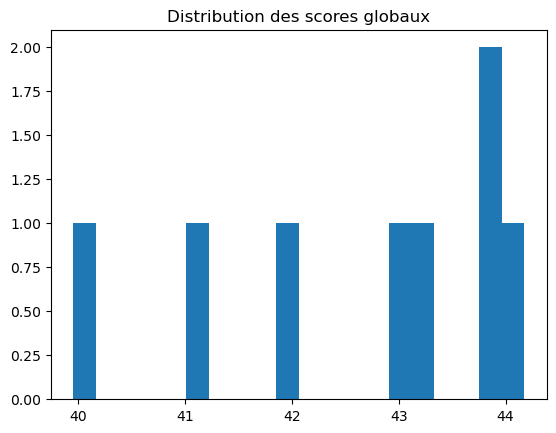

In [270]:
import matplotlib.pyplot as plt
plt.hist(df_score_moyen['Score_Global_Moyen_2010_2024'], bins=20)
plt.title("Distribution des scores globaux")
plt.show()